In [65]:
from scipy.io import wavfile
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import Audio, display
import os
from python_speech_features import mfcc, fbank, logfbank

In [5]:
def p(path):
    return "/home/ilya/Data/speech/{}".format(path)

In [21]:
labels = "yes no up down left right on off stop go".split()

In [35]:
files = {}
for l in labels:
    path_ = p('train/audio/'+l)
    files[l] = [os.path.join(path_, fname) for fname in os.listdir(path_)]

In [70]:
samples = [files[k][42] for k in files]
print(len(samples))
samples

10


['/home/ilya/Data/speech/train/audio/stop/b9515bf3_nohash_4.wav',
 '/home/ilya/Data/speech/train/audio/yes/29b81b73_nohash_0.wav',
 '/home/ilya/Data/speech/train/audio/go/38c388bc_nohash_0.wav',
 '/home/ilya/Data/speech/train/audio/right/75915c90_nohash_1.wav',
 '/home/ilya/Data/speech/train/audio/left/c1d39ce8_nohash_7.wav',
 '/home/ilya/Data/speech/train/audio/on/3411cf4b_nohash_0.wav',
 '/home/ilya/Data/speech/train/audio/up/c1d39ce8_nohash_7.wav',
 '/home/ilya/Data/speech/train/audio/no/db7c95b0_nohash_0.wav',
 '/home/ilya/Data/speech/train/audio/off/98447c43_nohash_1.wav',
 '/home/ilya/Data/speech/train/audio/down/3411cf4b_nohash_0.wav']

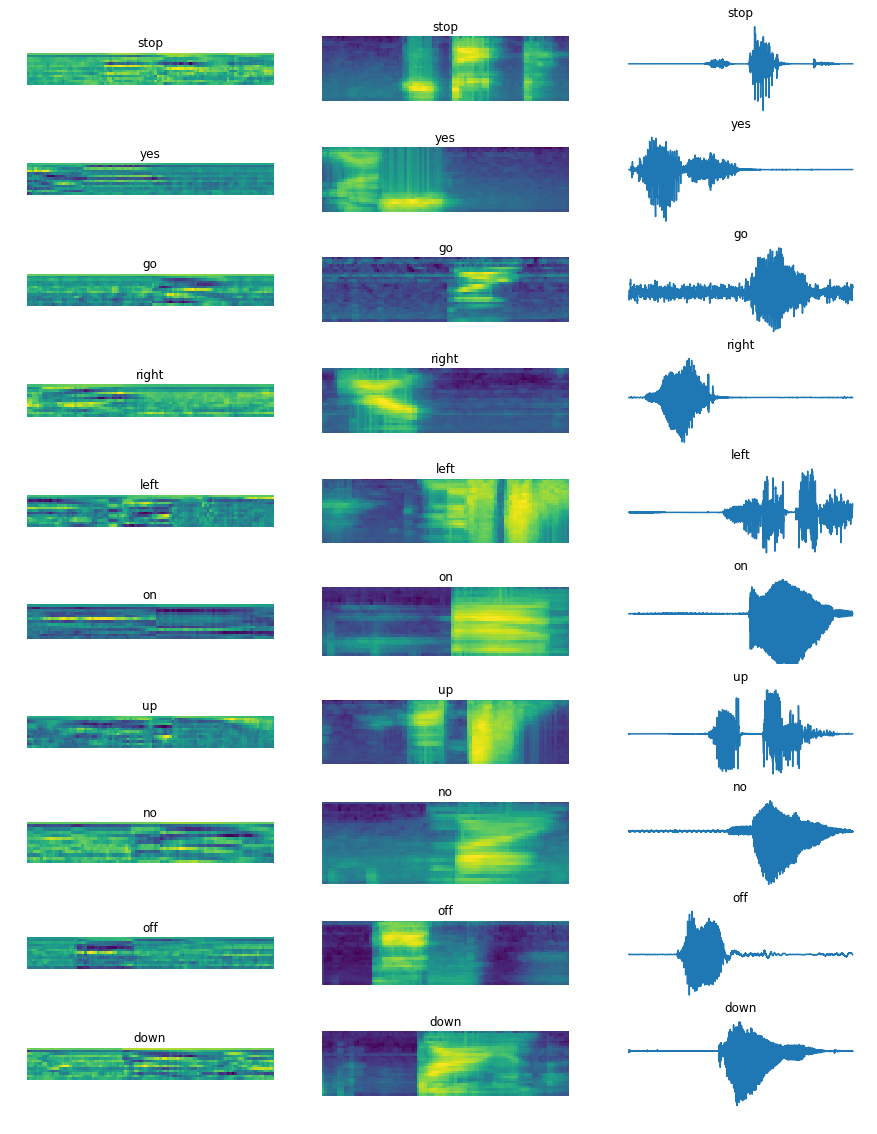

In [99]:
fig = plt.figure(figsize=(15,20))
for i, f in enumerate(samples):
    plt.subplot(10,3,3*i+1)
    sr, wav = wavfile.read(f)
    features = mfcc(wav, samplerate=sr)
    plt.title(f.split('/')[-2])
    plt.imshow(features.T)
    plt.axis('off')
    
    plt.subplot(10,3,3*i+2)
    features = logfbank(wav, samplerate=sr)
    plt.title(f.split('/')[-2])
    plt.imshow(features.T)
    plt.axis('off')
    
    plt.subplot(10,3,3*i+3)
    plt.title(f.split('/')[-2])
    plt.plot(wav)
    plt.axis('off')

In [76]:
for f in samples:
    sr, wav = wavfile.read(f)
    display(f.split('/')[-2])
    display(Audio(wav, rate=sr))

'stop'

'yes'

'go'

'right'

'left'

'on'

'up'

'no'

'off'

'down'

# Same

Check a sample of the same words by different speakers

In [85]:
path_ = p('train/audio/go')
samples_same = [os.path.join(path_, fname) for fname in os.listdir(path_)[35:45]]

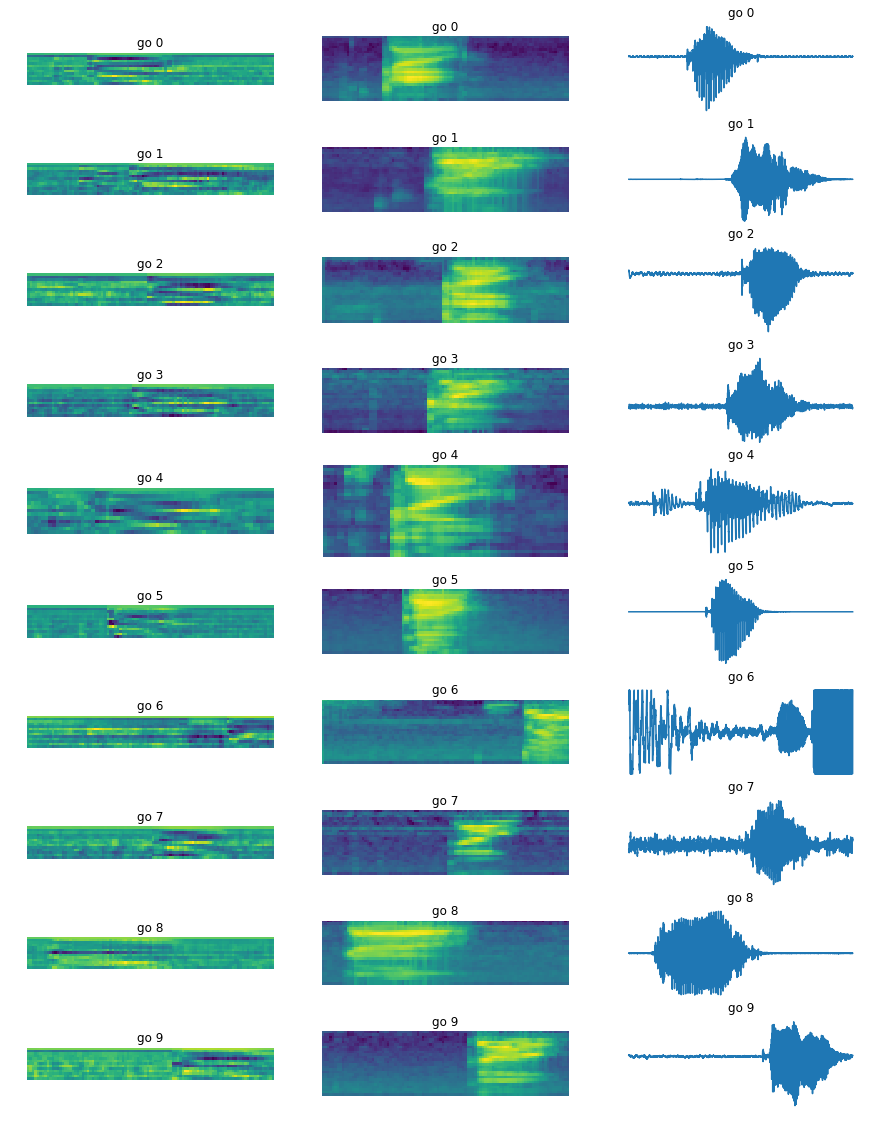

In [101]:
fig = plt.figure(figsize=(15,20))
for i, f in enumerate(samples_same):
    plt.subplot(10,3,3*i+1)
    sr, wav = wavfile.read(f)
    features = mfcc(wav, samplerate=sr)
    plt.title("{} {}".format(f.split('/')[-2], i))
    plt.imshow(features.T)
    plt.axis('off')
    
    plt.subplot(10,3,3*i+2)
    features = logfbank(wav, samplerate=sr)
    plt.title("{} {}".format(f.split('/')[-2], i))
    plt.imshow(features.T)
    plt.axis('off')
    
    plt.subplot(10,3,3*i+3)
    plt.title("{} {}".format(f.split('/')[-2], i))
    plt.plot(wav)
    plt.axis('off')

In [267]:
for i, f in enumerate(samples_same):
    sr, wav = wavfile.read(f)
    display(f.split('/')[-2] + str(i) + "-"+ str(len(wav)))
    display(Audio(wav, rate=sr))

'go0-16000'

'go1-16000'

'go2-15604'

'go3-16000'

'go4-11146'

'go5-16000'

'go6-16000'

'go7-16000'

'go8-16000'

'go9-16000'

In [277]:
sr, wav = wavfile.read(samples_same[4])
len(wav)

11146

In [276]:
sr, noise = wavfile.read(p('train/audio/_background_noise_/doing_the_dishes.wav'))
Audio(noise, rate=sr)

/home/ilya/.pyenv/versions/3.5.4/lib/python3.5/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [296]:
L = 16000
silence_data = noise

rem_len = L - len(wav)
i = np.random.randint(0, len(silence_data) - rem_len)
silence_part = silence_data[i:(i + L)]

j = np.random.randint(0, rem_len)
wav_new = np.concatenate([np.zeros(j), wav, np.zeros(rem_len-j)])

wav_new = silence_part * 0.3 + wav_new

print(len(wav_new))
Audio(wav_new, rate=sr)

16000


In [288]:
np.

11146

# Apply filters

In [264]:
sr, wav = wavfile.read(samples_same[0])
Audio(wav, rate=16000)

In [102]:
from pysndfx import AudioEffectsChain

In [171]:
apply_audio_effects = AudioEffectsChain()\
    .highshelf()\
    .speed(0.8)\
    .lowshelf()
    
y = apply_audio_effects(wav, sample_in=sr, sample_out=sr)
Audio(y, rate=sr)

In [172]:
apply_audio_effects = AudioEffectsChain()\
    .highshelf()\
    .speed(1.6)\
    .lowshelf()
    
y = apply_audio_effects(wav, sample_in=sr, sample_out=sr)
Audio(y, rate=sr)

In [205]:
apply_audio_effects = AudioEffectsChain()\
    .highshelf()\
    .reverb()\
    .lowshelf()
    
y = apply_audio_effects(wav, sample_in=sr, sample_out=sr)
Audio(y, rate=sr)

In [263]:
apply_audio_effects = AudioEffectsChain()\
    .highshelf()\
    .tremolo(5000)\
    .lowshelf()
    
y = apply_audio_effects(wav, sample_in=sr, sample_out=sr)
Audio(y, rate=sr)

In [265]:
apply_audio_effects = AudioEffectsChain()\
    .highshelf()\
    .delay(delays=(100,200))\
    .lowshelf()
    
y = apply_audio_effects(wav, sample_in=sr, sample_out=sr)
Audio(y, rate=sr)

In [357]:
sr, wav = wavfile.read(samples_same[7])
Audio(wav, rate=16000)

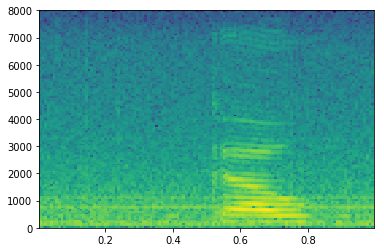

In [262]:
apply_audio_effects = AudioEffectsChain()\
    .highshelf(frequency=3000)\
    .lowshelf(frequency=300)
    
y = apply_audio_effects(wav, sample_in=sr, sample_out=sr)
_=plt.specgram(y, Fs=sr)
Audio(y, rate=sr)

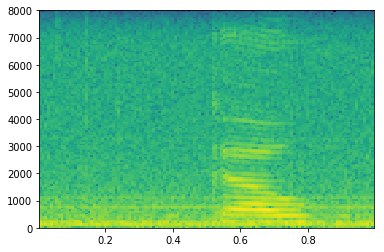

In [243]:
_=plt.specgram(wav, Fs=sr)

In [352]:
np.random.choice([0,1])

0

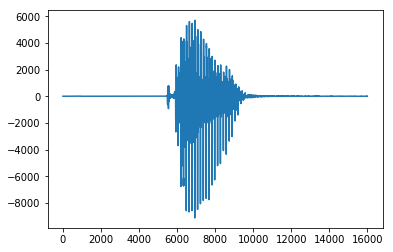

In [373]:
sr, wav = wavfile.read(samples_same[5])
plt.plot(wav)
Audio(wav, rate=16000)

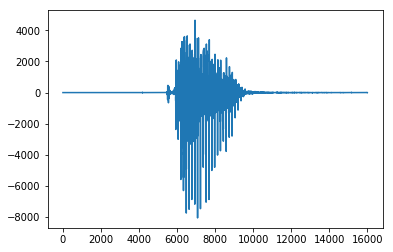

In [377]:
wav_n = wav * np.random.uniform(low=0, high=1, size=len(wav))
plt.plot(wav_n)
Audio(wav_n, rate=sr)

-404


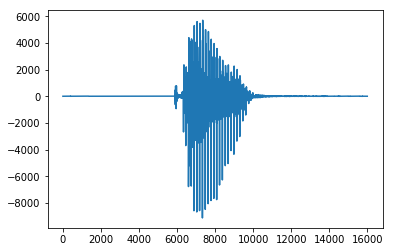

In [402]:
i = np.random.randint(-1600, 1600)
print(i)
plt.plot(np.append(wav[i:], wav[0:i]))
Audio